In [1]:
from xml.etree.ElementInclude import include

import pandas as pd


In [2]:
df = pd.read_csv("./data/complete_data.csv")

In [3]:
new_df = df.copy()

In [4]:
new_df.shape

(30189, 31)

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30189 entries, 0 to 30188
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   finishing_position     30187 non-null  object 
 1   horse_number           29851 non-null  float64
 2   horse_name             30189 non-null  object 
 3   horse_id               30189 non-null  object 
 4   jockey                 30189 non-null  object 
 5   trainer                30189 non-null  object 
 6   actual_weight          30189 non-null  object 
 7   declared_horse_weight  30189 non-null  object 
 8   draw                   30189 non-null  object 
 9   length_behind_winner   30189 non-null  object 
 10  running_position_1     29574 non-null  float64
 11  running_position_2     29560 non-null  float64
 12  running_position_3     29542 non-null  float64
 13  running_position_4     16618 non-null  float64
 14  finish_time            30189 non-null  object 
 15  wi

In [6]:
new_df.isnull().sum()

finishing_position           2
horse_number               338
horse_name                   0
horse_id                     0
jockey                       0
trainer                      0
actual_weight                0
declared_horse_weight        0
draw                         0
length_behind_winner         0
running_position_1         615
running_position_2         629
running_position_3         647
running_position_4       13571
finish_time                  0
win_odds                     0
running_position_5       26425
running_position_6       29640
race_id                      0
src                          0
race_date                    0
race_course                  0
race_number                  0
race_class                   0
race_distance                0
track_condition              0
race_name                    0
track                        0
sectional_time               0
incident_report              0
Season                       0
dtype: int64

In [7]:
new_df[new_df["finishing_position"].isnull()]

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,race_course,race_number,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report,Season
11053,NaN,NaN,SILVER BAUHINIA,T044,---,Y S Tsui,-,1138,---,---,...,Happy Valley,5,Class 4,1200,GOOD TO YIELDING,PINE HANDICAP,"TURF - ""A"" COURSE",23.47 22.92 24.77,"\n On arrival at the Start, TRE...",Autumn
17242,NaN,NaN,GREEN CARD,V126,---,J Moore,-,1169,---,---,...,Sha Tin,5,Class 3,1200,GOOD TO FIRM,THE HONG KONG JOCKEY CLUB COMMUNITY TROPHY (HA...,"TURF - ""C+3"" COURSE",23.92 22.68 22.33,"\n WONDERFUL JOURNEY, which was...",Spring


In finishing_position we have some position which are no properly writen ("1 DH", "2 DH", etc.,) we replace them with there real positions and remove those races where horses are not able to complete or participate in the race there are some NaN values also we are going to replace


In [8]:
# Replace "1 DH" to "1", "2 DH" to "2", etc.
new_df['finishing_position'] = new_df['finishing_position'].replace({
    "1 DH": "1", "2 DH": "2", "3 DH": "3", "4 DH": "4",
    "5 DH": "5", "6 DH": "6", "7 DH": "7", "8 DH": "8",
    "9 DH": "9", "10 DH": "10", "11 DH": "11", "12 DH": "12"
})

In [9]:
# Drop rows in column where value is not a number
new_df = new_df[new_df['finishing_position'].isin([str(i) for i in range(1, 13)])].reset_index(drop=True)

In [10]:
new_df.shape


(27686, 31)

There are some empty rows and columns with value "---",'-', We replace them with NAN

In [11]:
new_df.replace("---","NaN",inplace=True)

In [12]:
new_df.replace("-","NaN",inplace=True)

missing values

In [13]:
new_df.columns

Index(['finishing_position', 'horse_number', 'horse_name', 'horse_id',
       'jockey', 'trainer', 'actual_weight', 'declared_horse_weight', 'draw',
       'length_behind_winner', 'running_position_1', 'running_position_2',
       'running_position_3', 'running_position_4', 'finish_time', 'win_odds',
       'running_position_5', 'running_position_6', 'race_id', 'src',
       'race_date', 'race_course', 'race_number', 'race_class',
       'race_distance', 'track_condition', 'race_name', 'track',
       'sectional_time', 'incident_report', 'Season'],
      dtype='object')

In [14]:
#check missing values again
missing_data_check = new_df.isin(['NaN']) | new_df.isnull()

# Summarize missing values
missing_values_summary = missing_data_check.sum()

In [15]:
print(missing_values_summary)

finishing_position           0
horse_number                 0
horse_name                   0
horse_id                     0
jockey                       0
trainer                      0
actual_weight                0
declared_horse_weight        0
draw                         0
length_behind_winner      2373
running_position_1           0
running_position_2           0
running_position_3           0
running_position_4       12403
finish_time                  0
win_odds                     0
running_position_5       24160
running_position_6       27147
race_id                      0
src                          0
race_date                    0
race_course                  0
race_number                  0
race_class                   0
race_distance                0
track_condition              0
race_name                    0
track                        0
sectional_time               0
incident_report              0
Season                       0
dtype: int64


Now we drop some columns which are not important now for this problem.

In [16]:
columns_to_drop = ['horse_number','finish_time',
    'length_behind_winner', 'running_position_1', 'running_position_2',
    'running_position_3', 'running_position_4', 'running_position_5',
    'running_position_6', 'race_id', 'src', 'race_number', 'race_date','incident_report',
    'sectional_time']

new_df.drop(columns_to_drop, axis=1, inplace=True)

In [17]:
new_df.columns

Index(['finishing_position', 'horse_name', 'horse_id', 'jockey', 'trainer',
       'actual_weight', 'declared_horse_weight', 'draw', 'win_odds',
       'race_course', 'race_class', 'race_distance', 'track_condition',
       'race_name', 'track', 'Season'],
      dtype='object')

In [31]:
new_df['actual_weight'] = new_df['actual_weight'].astype(int)
new_df['declared_horse_weight'] = new_df['declared_horse_weight'].astype(int)
new_df['draw'] = new_df['draw'].astype(int)
new_df['race_distance'] = new_df['race_distance'].astype(int)
new_df['win_odds'] = new_df['win_odds'].astype(float)

In [36]:
new_df.shape

(27686, 16)

In [32]:
new_df.head()

,finishing_position,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,win_odds,race_course,race_class,race_distance,track_condition,race_name,track,Season
0,1,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,3.8,Sha Tin,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
1,2,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,8.0,Sha Tin,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
2,3,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,5.7,Sha Tin,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
3,4,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,6.1,Sha Tin,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
4,5,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,6.1,Sha Tin,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn


In [19]:
new_df.horse_name.value_counts()

horse_name
SWEET BEAN           47
ROCK THE TREE        47
ST YAZIN             46
INDUSTRIALIST WAY    46
VARA PEARL           45
                     ..
LEISURED FEET         1
THE LEGEND            1
LUCKY TIME            1
SHALLUCK              1
LITTLE WIND           1
Name: count, Length: 2112, dtype: int64

In [20]:
new_df.horse_id.value_counts()

horse_id
S205    47
P272    47
N409    46
S023    46
S138    45
        ..
A277     1
A318     1
A045     1
A295     1
N306     1
Name: count, Length: 2112, dtype: int64

In [21]:
new_df.jockey.value_counts()

jockey
J Moreira     1931
K Teetan      1652
Z Purton      1559
D Whyte       1537
N Callan      1497
              ... 
B Vorster        1
C Perkins        1
D O'Brien        1
Y Kawada         1
R Curatolo       1
Name: count, Length: 103, dtype: int64

In [22]:
new_df.trainer.value_counts()

trainer
A S Cruz       1629
C H Yip        1572
C Fownes       1569
J Moore        1548
Y S Tsui       1506
               ... 
J M Moore         1
W H Tse           1
R Hickmott        1
G Bietolini       1
Ed Walker         1
Name: count, Length: 87, dtype: int64

In [23]:
new_df.race_course.unique()

array(['Sha Tin', 'Happy Valley'], dtype=object)

In [24]:
new_df.race_class.unique()

array(['Class 5', 'Class 2', 'Class 1', 'Class 4', 'Class 3',
       'Hong Kong Group Three', 'Class 4 (Restricted)',
       'Hong Kong Group Two', 'Group Two', 'Group One', 'Restricted Race',
       'Class 4 (Special Condition)', 'Hong Kong Group One',
       'Griffin Race', 'Class 3 (Special Condition)', 'Group Three'],
      dtype=object)

In [25]:
new_df.track_condition.unique()

array(['GOOD TO FIRM', 'WET FAST', 'GOOD', 'GOOD TO YIELDING', 'WET SLOW',
       'FAST', 'YIELDING', 'YIELDING TO SOFT', 'SOFT'], dtype=object)

In [26]:
new_df.race_name.unique()

array(['TIM WA HANDICAP', 'COTTON TREE HANDICAP', 'TIM MEI HANDICAP', ...,
       'CONTINUOUS DEVELOPMENT HANDICAP', 'CHAI WAN ROAD PLATE',
       'MEDIC KINGDOM HANDICAP'], dtype=object)

In [27]:
new_df.track.unique()

array(['TURF - "A" COURSE', 'ALL WEATHER TRACK', 'TURF - "A+3" COURSE',
       'TURF - "B+2" COURSE', 'TURF - "C" COURSE', 'TURF - "C+3" COURSE',
       'TURF - "B" COURSE'], dtype=object)

In [28]:
new_df.Season.unique()

array(['Autumn', 'Winter', 'Spring', 'Summer'], dtype=object)

from all the above categorical columns Horse_name, jockey, trainer have large number of unique values so we use some advance techniques on them but for remaining we replace text with easy numeric vales

In [33]:
numeric_df = new_df.select_dtypes(include=['number']).copy()
categorical_df = new_df.select_dtypes(exclude=['number']).copy()

In [34]:
numeric_df.head()

,actual_weight,declared_horse_weight,draw,win_odds,race_distance
0,133,1032,1,3.8,1400
1,133,1075,13,8.0,1400
2,121,1065,3,5.7,1400
3,132,1222,2,6.1,1400
4,125,1136,9,6.1,1400


<Axes: xlabel='declared_horse_weight', ylabel='Count'>

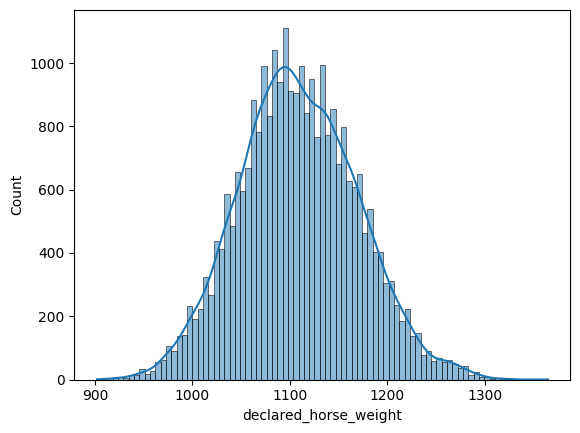

In [39]:
import seaborn as sns
sns.histplot(numeric_df, x="declared_horse_weight", kde=True)

In [35]:
categorical_df.head()

,finishing_position,horse_name,horse_id,jockey,trainer,race_course,race_class,track_condition,race_name,track,Season
0,1,DOUBLE DRAGON,K019,B Prebble,D Cruz,Sha Tin,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
1,2,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,Sha Tin,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
2,3,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,Sha Tin,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
3,4,SUPREME PROFIT,P230,J Moreira,C S Shum,Sha Tin,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
4,5,THE ONLY KID,H173,Z Purton,K W Lui,Sha Tin,Class 5,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",Autumn
